# Домашнее задание к лекции "Визуализация данных"
**Обязательная часть**
Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные**?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

## Дополнительная часть (необязательная)

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
- не менее двух визуализаций должны быть интерактивными.

### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/). Не сможем проверить или помочь, если вы пришлете:

- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:
1) Что я делаю?
2) Какого результата я ожидаю?
3) Как фактический результат отличается от ожидаемого?
4) Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [2]:
! pip install missingno
import missingno as msno 

In [3]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# Чтение файла

In [4]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Описание данных


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# Пропущенные значения

Есть пропущенные данные в колонках: director, cast, country, date_added, rating.
Посмотрим подробнее где пропуски и с чем они могут быть связаны.

In [6]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

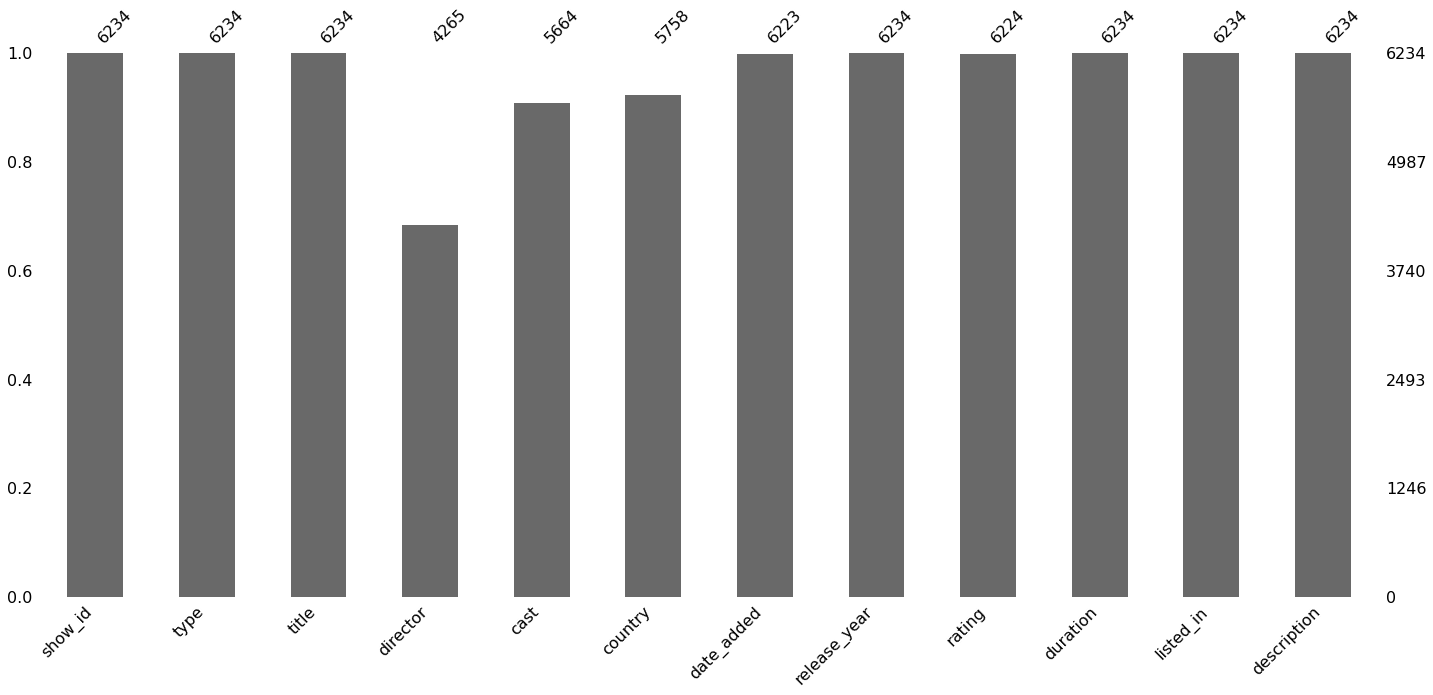

In [7]:
# визуализация NaN в колонках


msno.bar(netflix_df) 

<AxesSubplot:>

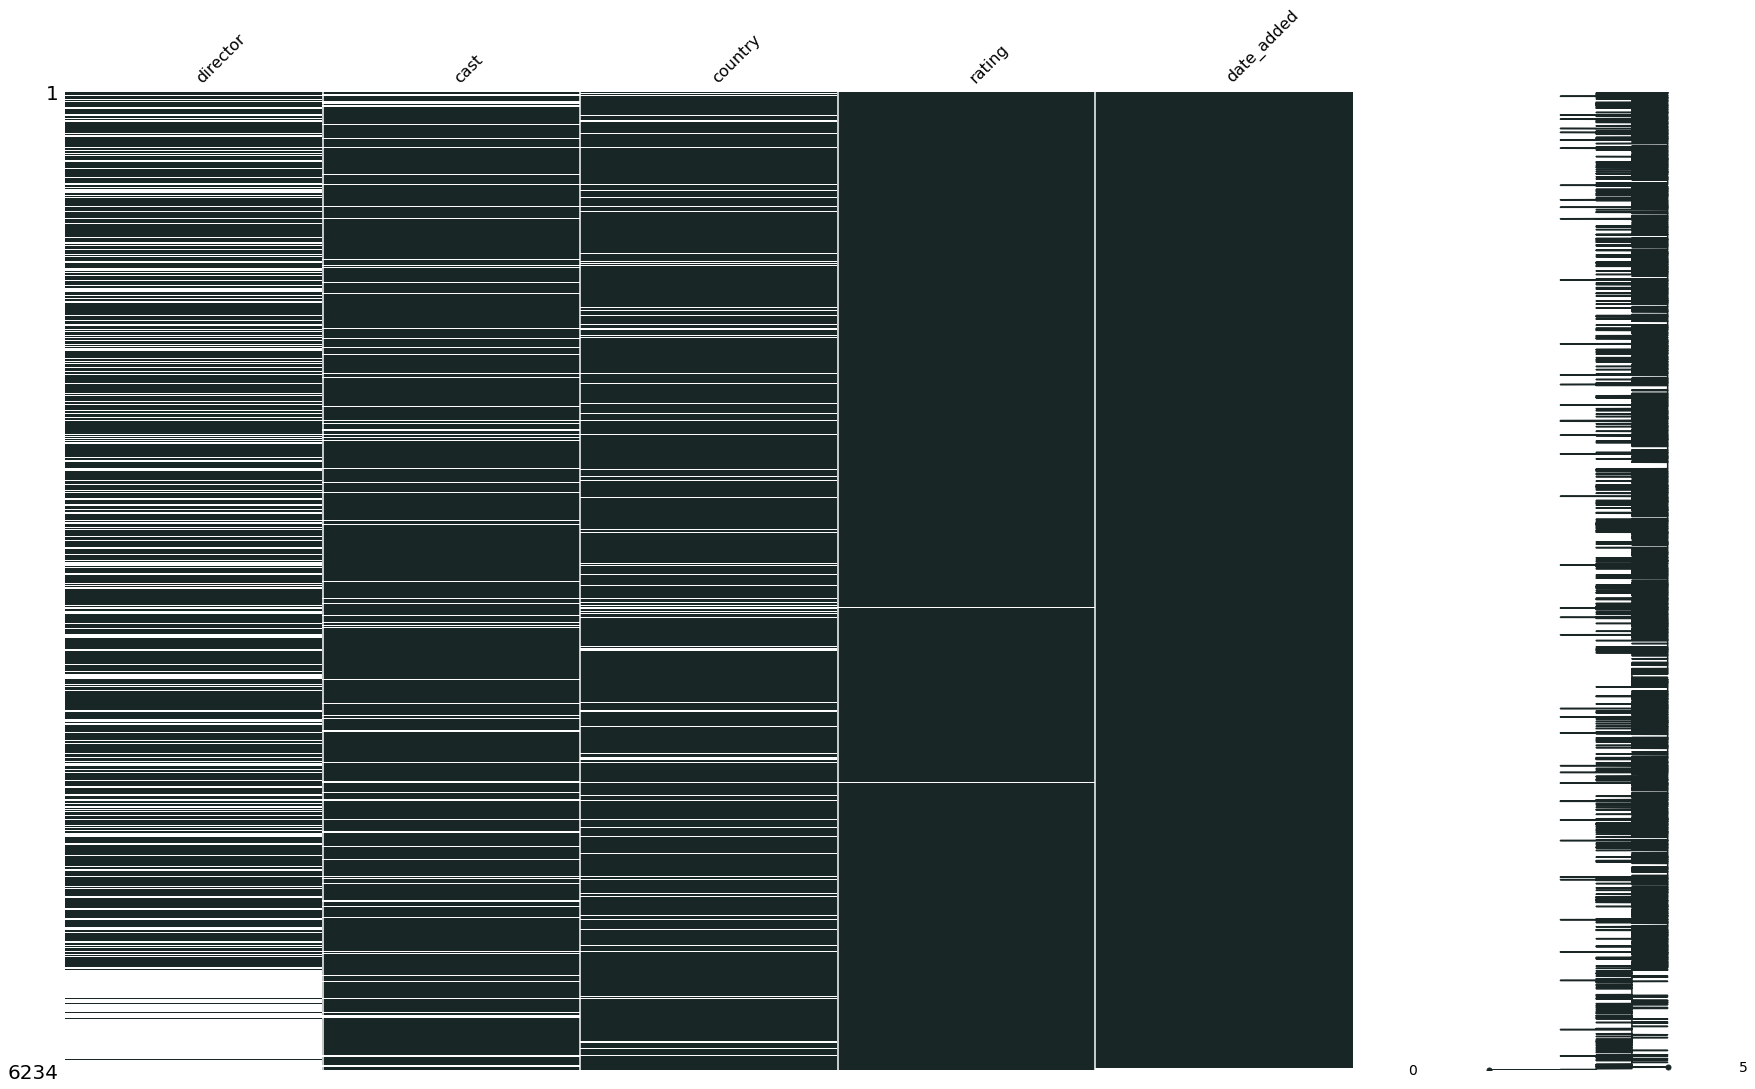

In [8]:
msno.matrix(
    netflix_df[['director', 'cast', 'country','rating', 'date_added']], 
    figsize=(30,18), width_ratios=(20, 5), color=(0.1, 0.15, 0.15)
)

<AxesSubplot:>

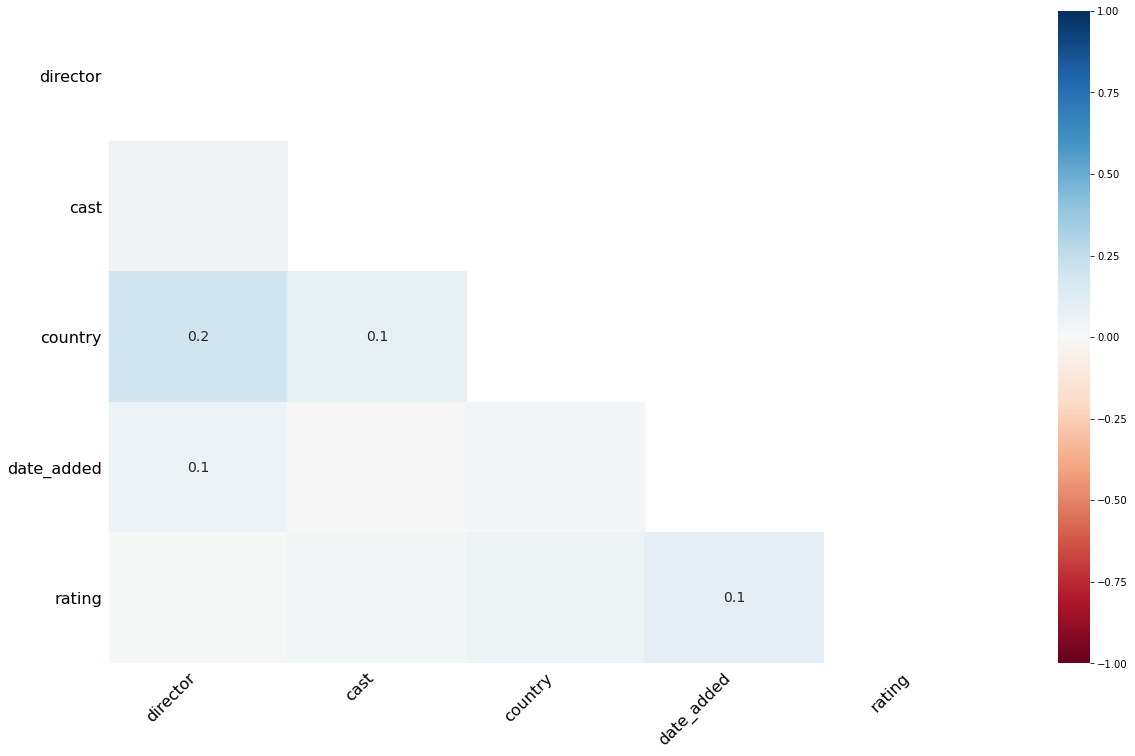

In [9]:
msno.heatmap(netflix_df)

Большая часть пропусков приходится на Director

Пропущенные данные в director, cast, country, date_added, rating распределены неравномерно и часто не пересекаются между собой. Общего паттерна пропусков - нет.

Есть незначительная корреляция между наличием данных в столбцах country и director, country и cast, date_added и director, rating и date_added. Нужно подробнее изучить данные в этих колонках, чтобы понять причину корреляции - она случайна, есть какая-то закономерность в данных этих колонок или это связано с иными причинами
Между отсутствием и наличием данных между остальными колонками корреляции не обнаружено.

Пока пропуски данных выглядят случайными.

Визуализируем распределение данных из всего датасете (количество и доля значений по столбцам) и сравним с распределением тех же данных для пропущенных значнеий

# Type


(-1.107415400635508, 1.111130759589276, -1.11200847501705, 1.100571832143669)

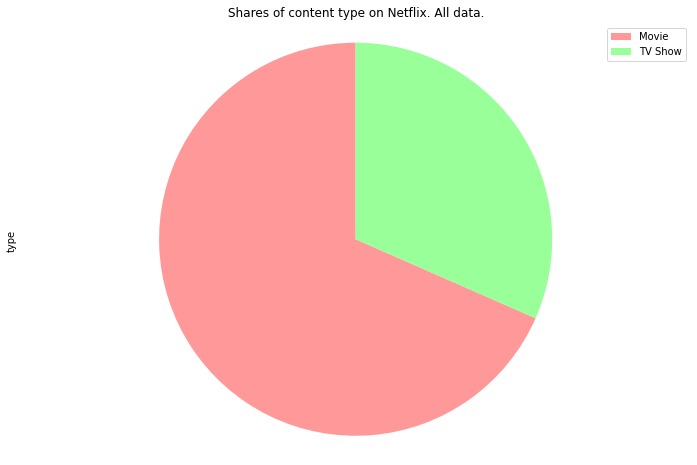

In [10]:
color_set = ('#ff9999', '#99ff99')

fig, ax = plt.subplots(figsize=(12, 8))

netflix_df['type'].value_counts().sort_index(axis = 0).plot(
    kind = 'pie', startangle=90, labeldistance=None, colors=color_set
)
ax.set_title('Shares of content type on Netflix. All data.')
ax.legend()
ax.axis('equal')

Большая часть контента - фильмы

**Будет ли распределение типов контента таким же среди контента с пропущенными данными? Возможно ли, что пропуски связаны с типом контента?**

In [11]:
no_director = netflix_df[ netflix_df.director.isnull() ]
no_director_type = pd.DataFrame(no_director['type'].value_counts().sort_index(axis = 0))

no_cast = netflix_df[ netflix_df.cast.isnull() ]
no_cast_type = pd.DataFrame(no_cast['type'].value_counts().sort_index(axis = 0))

no_country = netflix_df[ netflix_df.country.isnull() ]
no_country_type = pd.DataFrame(no_country['type'].value_counts().sort_index(axis = 0))

no_date_added = netflix_df[ netflix_df.date_added.isnull() ]
no_date_added_type = pd.DataFrame(no_date_added['type'].value_counts().sort_index(axis = 0))

no_rating = netflix_df[ netflix_df.rating.isnull() ]
no_rating_type = pd.DataFrame(no_rating['type'].value_counts().sort_index(axis = 0))

Text(0.5, 0.98, 'Пропуски данных в фильмах и тв-шоу')

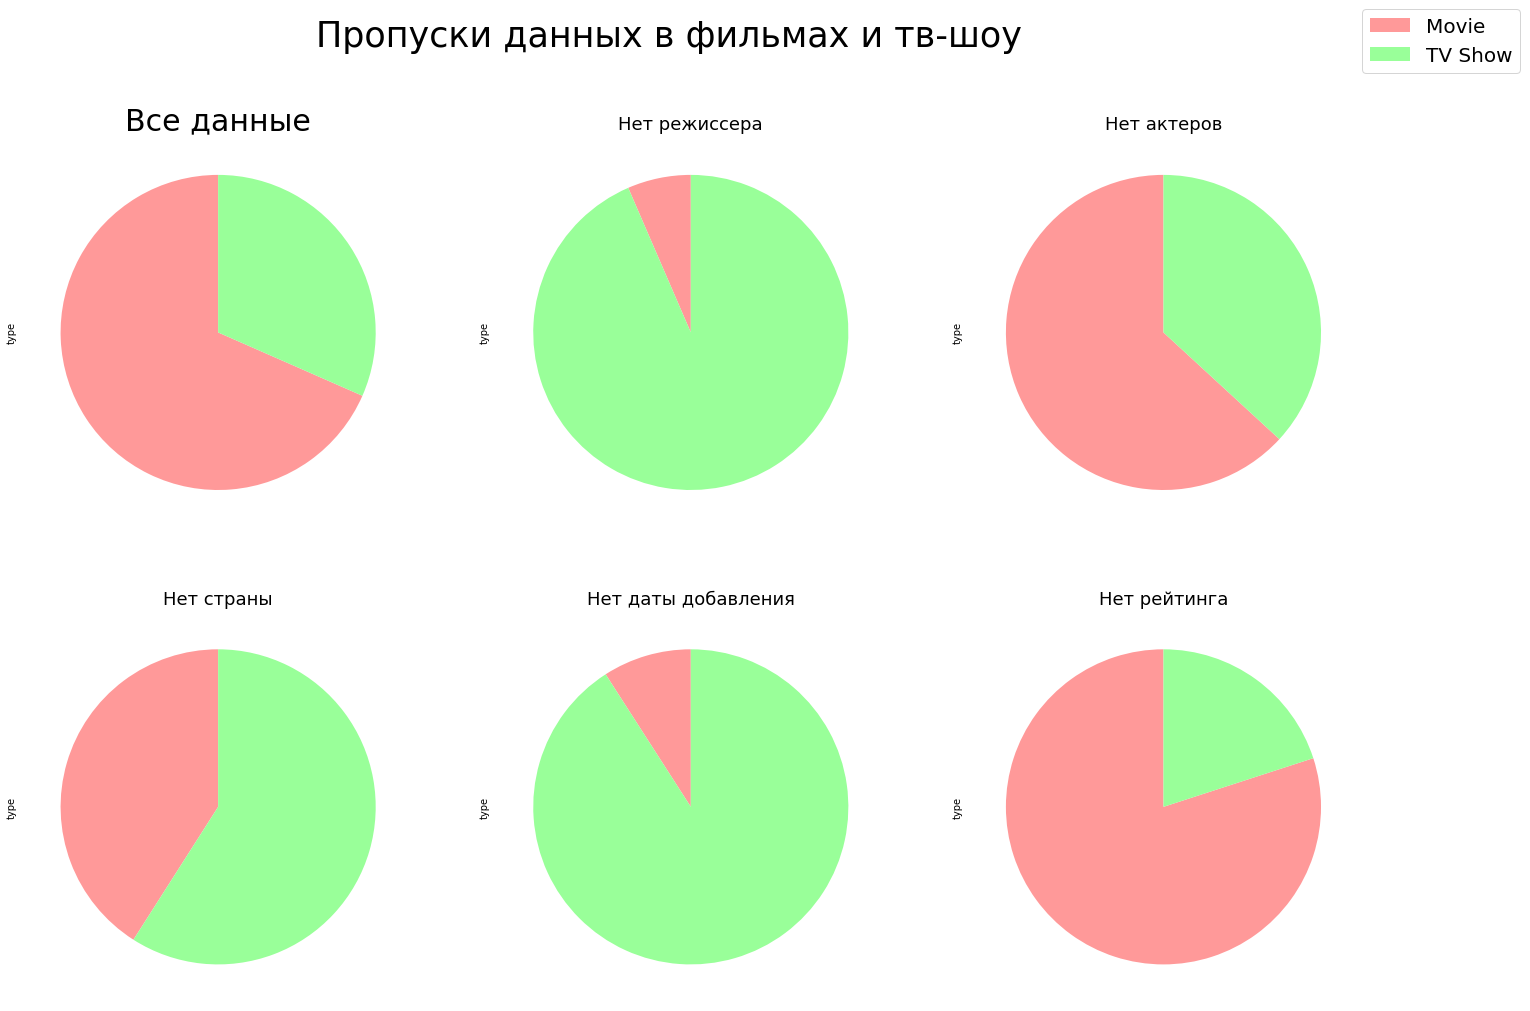

In [74]:
color_set = ('#ff9999', '#99ff99')

fig, axs = plt.subplots(2,3, figsize=(24, 16))

netflix_df['type'].value_counts().sort_values(ascending=False).plot(
    kind = 'pie', 
    ax=axs[0,0], 
    startangle=90, 
    labeldistance=None, 
    colors=color_set
)

no_director_type['type'].plot(
    kind='pie', 
    ax=axs[0,1], 
    startangle=90, 
    labeldistance=None, 
    colors=color_set
)

no_cast_type['type'].plot(
    kind='pie', \
    ax=axs[0,2], 
    startangle=90, 
    labeldistance=None, 
    colors=color_set
    
)

no_country_type['type'].plot(
    kind='pie', 
    ax=axs[1,0],
    startangle=90, 
    labeldistance=None, 
    colors=color_set
)

no_date_added_type['type'].plot(
    kind='pie', 
    ax=axs[1,1],
    startangle=90, 
    labeldistance=None, 
    colors=color_set
)


no_rating_type['type'].plot(
    kind='pie', 
    ax=axs[1,2],
    startangle=90, 
    labeldistance=None, 
    colors=color_set
)

axs[0,0].set_title("Все данные", fontsize=30)
axs[0,1].set_title("Нет режиссера", fontsize=18)
axs[0,2].set_title("Нет актеров", fontsize=18)
axs[1,0].set_title("Нет страны", fontsize=18)
axs[1,1].set_title("Нет даты добавления", fontsize=18)
axs[1,2].set_title("Нет рейтинга", fontsize=18)

lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc = 'upper right', fontsize = 'large', prop={'size': 20})
fig.suptitle('Пропуски данных в фильмах и тв-шоу', fontsize=35)

На некоторых визуализациях распределение типа контента отличается от распределения по всем данным.

Пропуски в столбцах **director**, **date_added** скорее всего **связаны** с типом контента

Пропуски в **country** и **rating** **возможно связаны** с типом контента

**Cast** скорее всего **не связаны** с типом контента

# Listed in

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:
# Распределение контента по категориям

netflix_df['listed_in_list'] = netflix_df['listed_in'].apply( lambda x: x.split(', ') )
mlb = MultiLabelBinarizer()

one_hot_listed = pd.DataFrame(mlb.fit_transform(netflix_df['listed_in_list']),columns=mlb.classes_, index=netflix_df.index)
listed_sum = one_hot_listed.sum(axis = 0, skipna = True) 
listed_sum = listed_sum.sort_values(ascending=False)

listed_sum_df = pd.DataFrame(listed_sum).reset_index()
listed_sum_df.columns = ['category', 'num']

In [15]:
# Распределение контента по категориям для фильмов

movies_idx = netflix_df[ netflix_df.type == 'Movie' ].index.to_list()
one_hot_listed_movies = one_hot_listed.iloc[ lambda x: x.index.isin(movies_idx) ] 
listed_sum_movies = one_hot_listed_movies.sum(axis = 0, skipna = True) 
listed_sum_movies = listed_sum_movies.sort_values(ascending=False)[ listed_sum_movies != 0 ]

In [16]:
# Распределение контента по категориям для ТВ-шоу

tvshow_idx = netflix_df[ netflix_df.type == 'TV Show' ].index.to_list()
one_hot_listed_tvshow = one_hot_listed.iloc[ lambda x: x.index.isin(tvshow_idx) ] 
listed_sum_tvshow = one_hot_listed_tvshow.sum(axis = 0, skipna = True) 
listed_sum_tvshow = listed_sum_tvshow.sort_values(ascending=False)[ listed_sum_tvshow != 0 ]

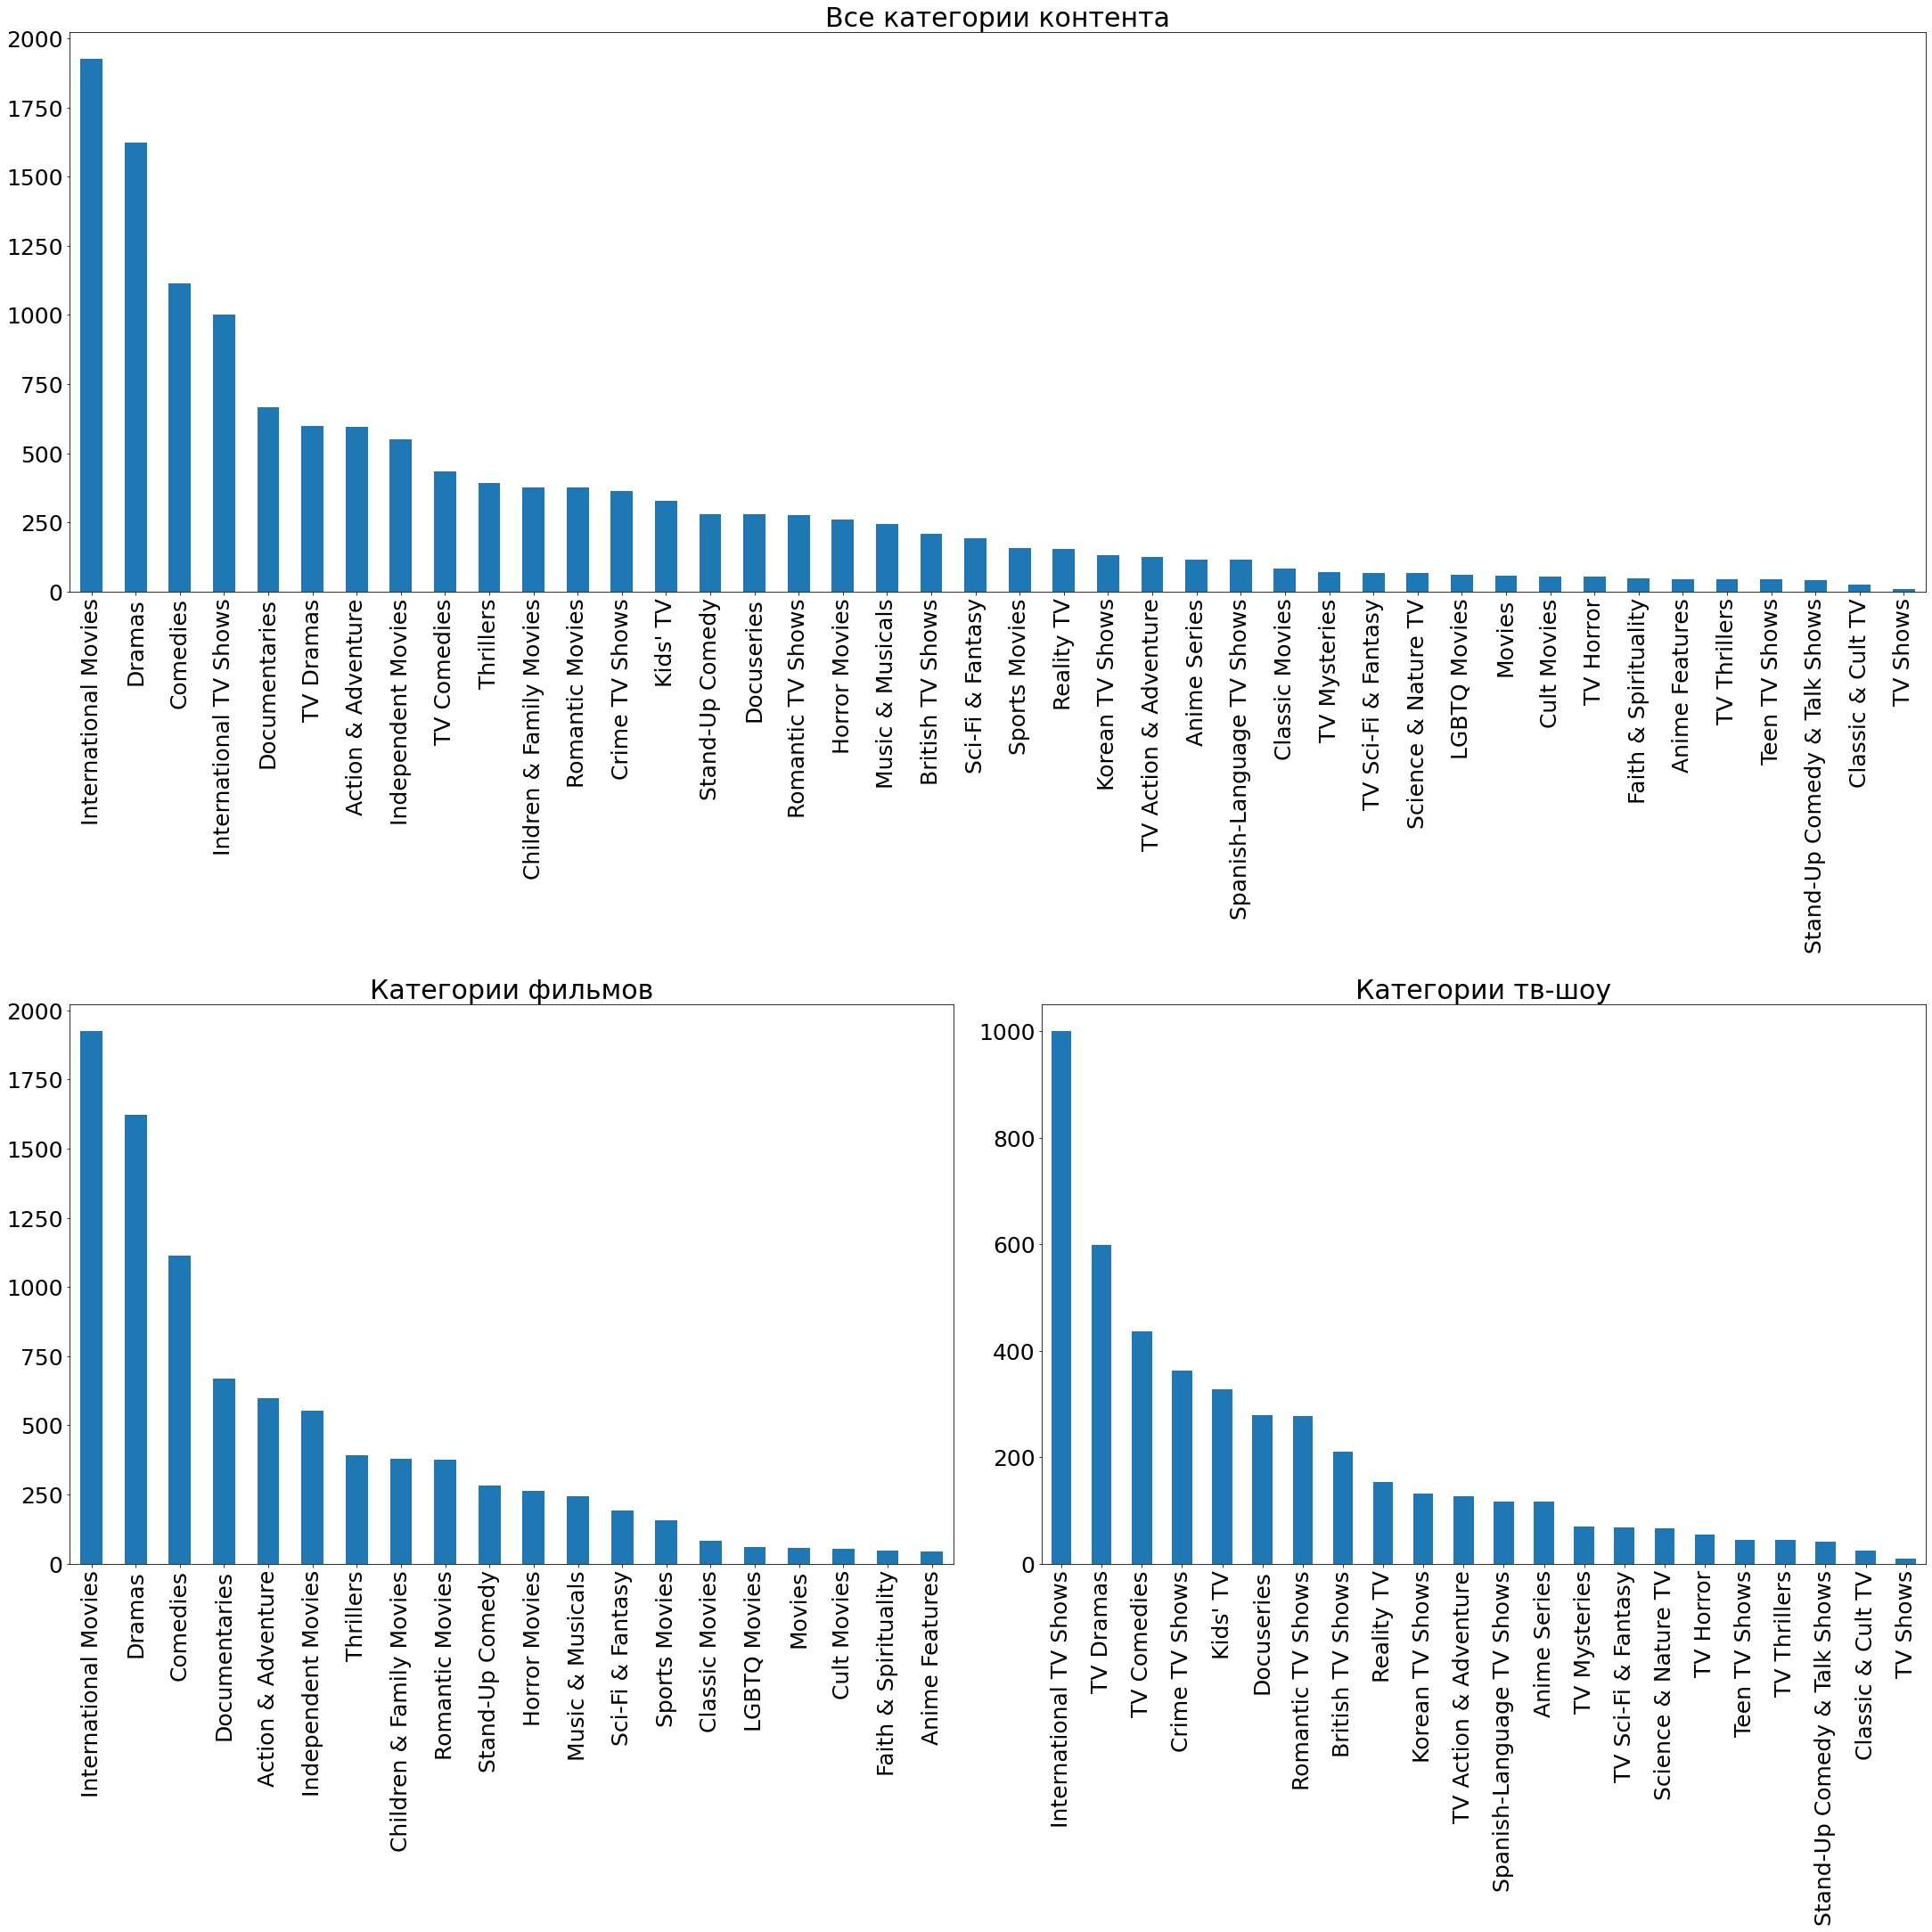

In [75]:
fig2 = plt.figure(constrained_layout=True, figsize=(30, 30))
gs = fig2.add_gridspec(2, 2)


f2_ax1 = fig2.add_subplot(gs[0, :])
f2_ax1.set_title('Все категории контента', fontsize=30)
listed_sum.plot(
    kind='bar'
)
f2_ax1.tick_params(axis='both', which='major', labelsize=25)


f2_ax2 = fig2.add_subplot(gs[1,0])
f2_ax2.set_title('Категории фильмов', fontsize=30)
listed_sum_movies.plot(
    kind='bar'
)
f2_ax2.tick_params(axis='both', which='major', labelsize=25)


f2_ax3 = fig2.add_subplot(gs[1,1])
f2_ax3.set_title('Категории тв-шоу', fontsize=30)
listed_sum_tvshow.plot(
    kind='bar'
)
f2_ax3.tick_params(axis='both', which='major', labelsize=25)


Контент распределен по категориям неравномерно.

Топ 3 наиболее часто встречающихся категорий относятся к фильмам.

Топ 3 категории для фильмов и ТВ-шоу - одинаковые: International, Dramas, Comedies.


**Посмотрим на распределение категорий для контента с пропущенными данными**

In [18]:
def create_one_hot_data_frame(df, one_hot_df):
    idx = df.index.to_list()
    one_hot_listed = one_hot_df.iloc[ lambda x: x.index.isin(idx) ]
    one_hot_listed_sum = one_hot_listed.sum(axis = 0, skipna = True) 
    one_hot_listed_sum = pd.DataFrame(one_hot_listed_sum).reset_index()
    one_hot_listed_sum.columns = ['category', 'num']
    return one_hot_listed_sum

Text(0.5, 0.98, 'В контенте каких типов пропущены данные о режиссере')

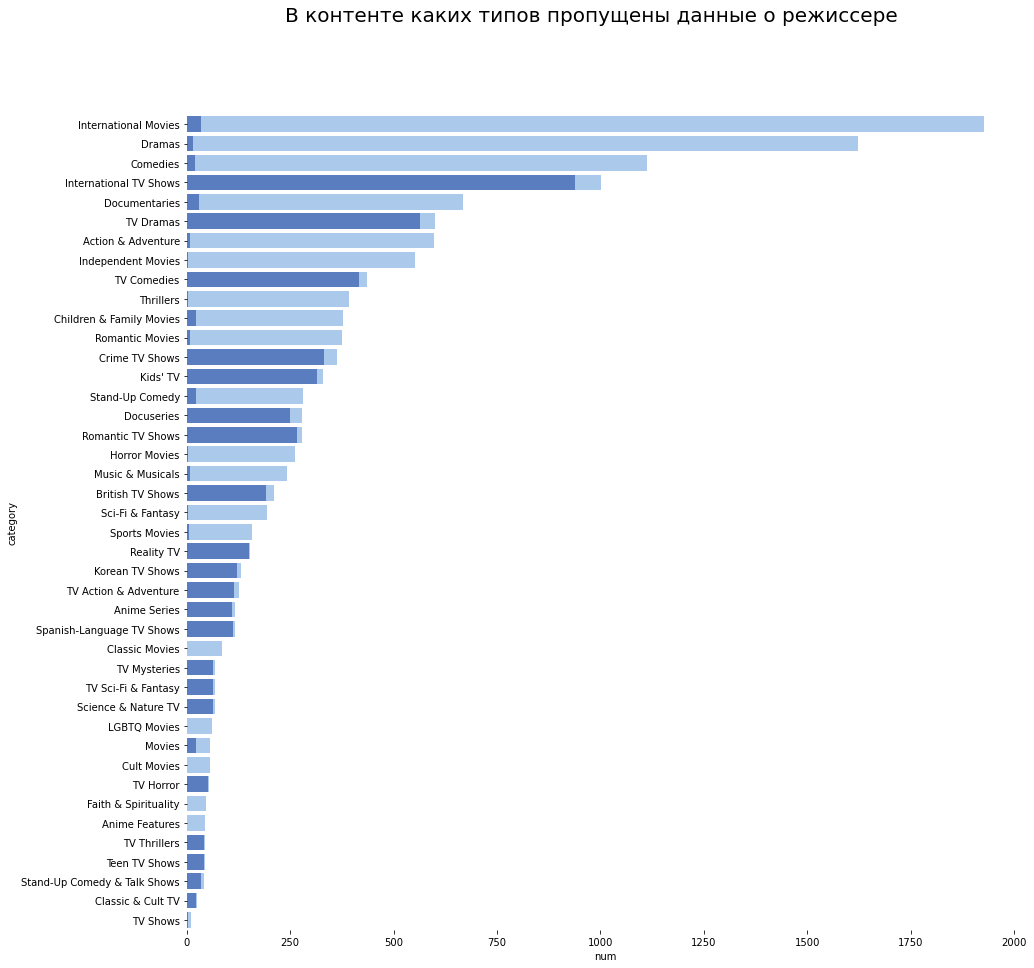

In [85]:
fig3, ax3 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("pastel")
sns.barplot(x='num', y='category', data=listed_sum_df,
            label="All content categories", color="b")

sns.set_color_codes("muted")
sns.barplot(x='num', y='category', data=create_one_hot_data_frame(no_director, one_hot_listed),
            order=list(listed_sum_df.category), label="No director", color="b")

sns.despine(left=True, bottom=True)

fig3.suptitle('В контенте каких типов пропущены данные о режиссере', fontsize=20)

Отсутствующие данные примерно повторяют распределение по категориям для тв-шоу, для фильмов распределение выглядит случайным - нет доминирующей категории/категорий. 

Можно сделать вывод, что **отсутствие режиссера связано с типом контента (ТВ-шоу), но не с категорией контента**.
Так же возможна связь с дргими факторами.

Text(0.5, 0.98, 'В контенте каких типов пропущены данные об актерах')

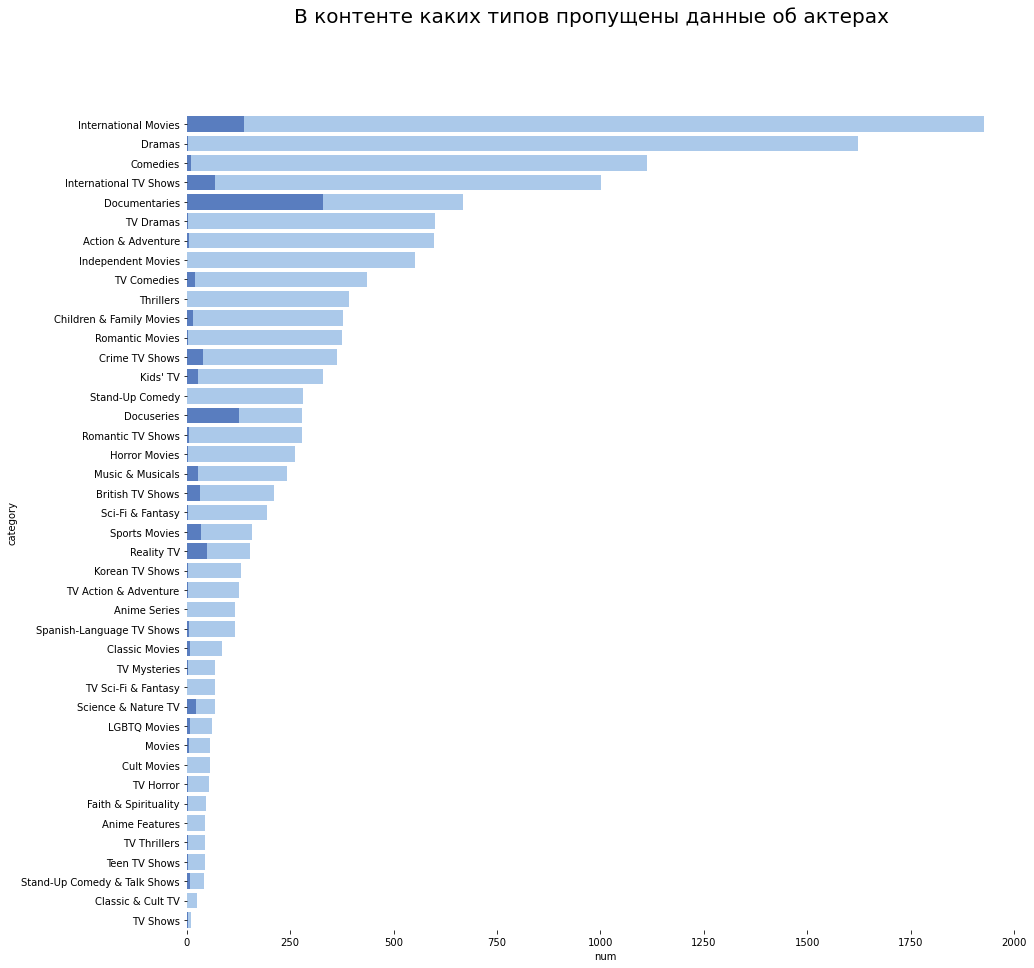

In [88]:
fig4, ax4 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("pastel")
sns.barplot(x='num', y='category', data=listed_sum_df,
            label="All content categories", color="b")

sns.set_color_codes("muted")
sns.barplot(x='num', y='category', data=create_one_hot_data_frame(no_cast, one_hot_listed),
            order=list(listed_sum_df.category), label="No cast", color="b")


sns.despine(left=True, bottom=True)

fig4.suptitle('В контенте каких типов пропущены данные об актерах', fontsize=20)

С отсутствием актеров ситуация интереснее. На круговой диаграме не было обнаружено взаимосвязи с типом контента, зато скорее всего есть взаимосвязь с категориями контета, т.к. распределение заметно отличается от распределения по всем данным. Посмотрим подробнее

In [21]:
create_one_hot_data_frame(no_cast, one_hot_listed).sort_values(by='num', ascending=False).iloc[:15].style.bar()

,category,num
10,Documentaries,328
16,International Movies,138
11,Docuseries,126
17,International TV Shows,69
23,Reality TV,48
8,Crime TV Shows,40
29,Sports Movies,34
3,British TV Shows,33
18,Kids' TV,28
22,Music & Musicals,27


**В большинстве случаев актеры не указаны для документальных фильмов и сериалов**.

Так же, есть много пропусков в международных фильмах и ТВ-шоу. Необходимо подробнее рассмотреть почему там пропущены такое количество данных - это связано с тем, что контента этой категории больше чем остального, либо тут есть другой фактор?

In [22]:
no_cast_international_idx = one_hot_listed[['International Movies', 'International TV Shows']]\
[ (one_hot_listed['International Movies'] != 0) | (one_hot_listed['International TV Shows'] != 0)].index.to_list()

no_cast_international = no_cast.iloc[ lambda x: x.index.isin(no_cast_international_idx) ]

no_cast_international.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
72,80181555,TV Show,The Royal House of Windsor,NaN,NaN,United Kingdom,"September 30, 2017",2017,TV-14,1 Season,"British TV Shows, Docuseries, International TV...","Drawing on newly available info, this show tra..."
82,80119349,Movie,Out of Thin Air,Dylan Howitt,NaN,NaN,"September 29, 2017",2017,TV-14,85 min,"Documentaries, International Movies",Picking up 40 years after six were convicted f...
86,81053893,Movie,Cultivating the Seas: History and Future of th...,Mana Yasuda,NaN,NaN,"September 28, 2019",2019,TV-G,45 min,"Documentaries, International Movies",An in-depth look at the full-cycle breeding pr...
93,80201933,TV Show,Made in Mexico,NaN,NaN,United States,"September 28, 2018",2018,TV-MA,1 Season,"International TV Shows, Reality TV, Spanish-La...",These Mexico City socialites may lead opulent ...
97,80992039,Movie,Two Catalonias,"Álvaro Longoria, Gerardo Olivares",NaN,Spain,"September 28, 2018",2018,TV-MA,117 min,"Documentaries, International Movies",Lawmakers and activists with conflicting ideol...


В скольких случаях International и Documentaries относятся к одному контенту?

In [23]:
no_cast_international.shape

(207, 12)

In [24]:
no_cast_international_idx = one_hot_listed[['Docuseries', 'Documentaries']][ (one_hot_listed['Docuseries'] != 0) | (one_hot_listed['Documentaries'] != 0)].index.to_list()

no_cast_international.iloc[ lambda x: x.index.isin(no_cast_international_idx) ].shape

(169, 12)

В большинстве случаев (169/207) контент без актеров, имеющий категорию International так же относится и к категории Documentaries. 
Так что можно предположить, что **cast не указывается в случае документальных и реалити шоу**

В случае данных с пропусками в остальных столбцах, закономерностей обнаружить не удалось

## В каком месяце наиболее часто было добавление контента

In [25]:
netflix_df['datetime_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['datetime_added'].dt.year.astype('Int64')
netflix_df['month_added'] = netflix_df['datetime_added'].dt.month.astype('Int64')

netflix_df_drop_empty_date = netflix_df[['year_added', 'month_added', 'title']].dropna()

In [26]:
year_month_matrix = pd.pivot_table( 
    netflix_df_drop_empty_date[netflix_df_drop_empty_date.year_added != 2020], 
    values='title', index='month_added', columns='year_added', 
    aggfunc='count', fill_value=0
)


year_month_matrix['mean']= year_month_matrix.mean(axis=1).astype('int64')
year_month_matrix = year_month_matrix.rename(
    index={1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 
           6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
)

Text(0.5, 0.98, 'В каком месяце наиболее часто было добавление контента')

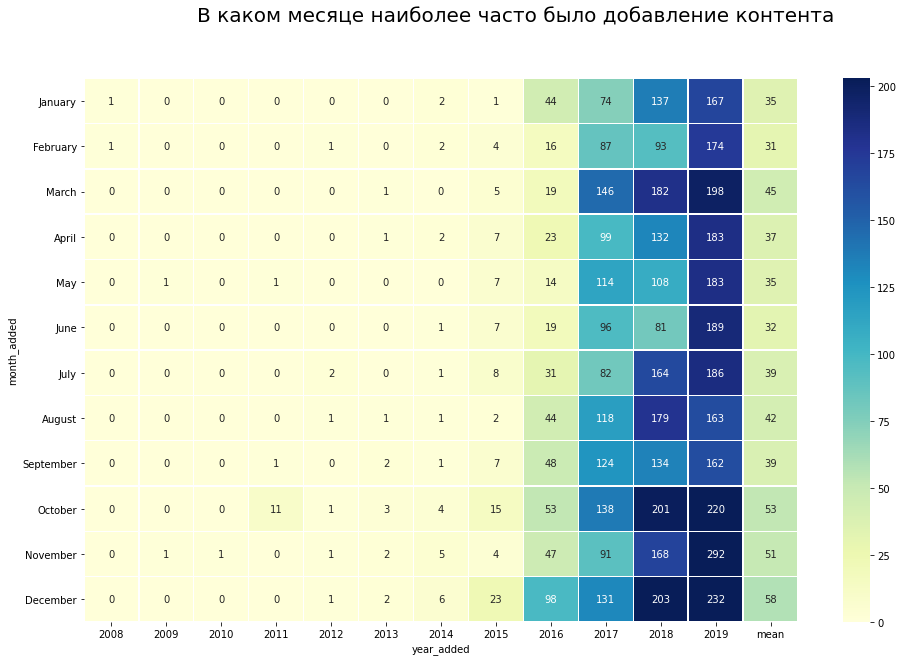

In [89]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(year_month_matrix, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu", robust=True)

f.suptitle('В каком месяце наиболее часто было добавление контента', fontsize=20)

Больше всего выделяются - март и октябрь, ноябрь, декабрь. 

Март и Октябрь - обычное время для релиза новых сезонов сериалов.

Декабрь - праздничное время, большее количество релиза контента может быть связано с тем, что пользователи в этот период проводят больше времени за просмотром Нетфликса.

## Распределение длительности фильмов

In [28]:
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration']\
                                              .split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

In [29]:
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration']\
                                          .split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [90]:
series_duration = netflix_df[ netflix_df['type'] == 'TV Show' ]['season_count'].astype('int64').value_counts()

In [31]:
mv_duration = netflix_df[ netflix_df['type'] == 'Movie' ]['duration'].astype('int64')

Text(0.5, 1.0, 'Распределение длительности фильмов')

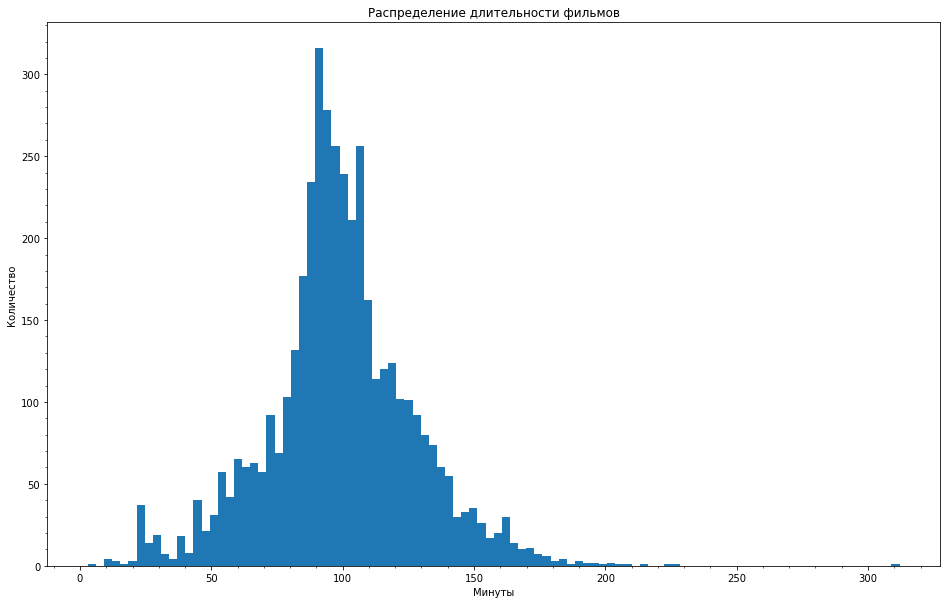

In [94]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(16, 10))

ax.hist(mv_duration, bins=100)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.title('Распределение длительности фильмов')


Длительность фильмов распределена нормально.
Большая часть контента находится в интервале от 90 до 110 мин.
В левой части график более неровный, чем в правой, возможно это связано с короткометражными фильмами.

Text(0.5, 1.0, 'Распределение длительности сериалов')

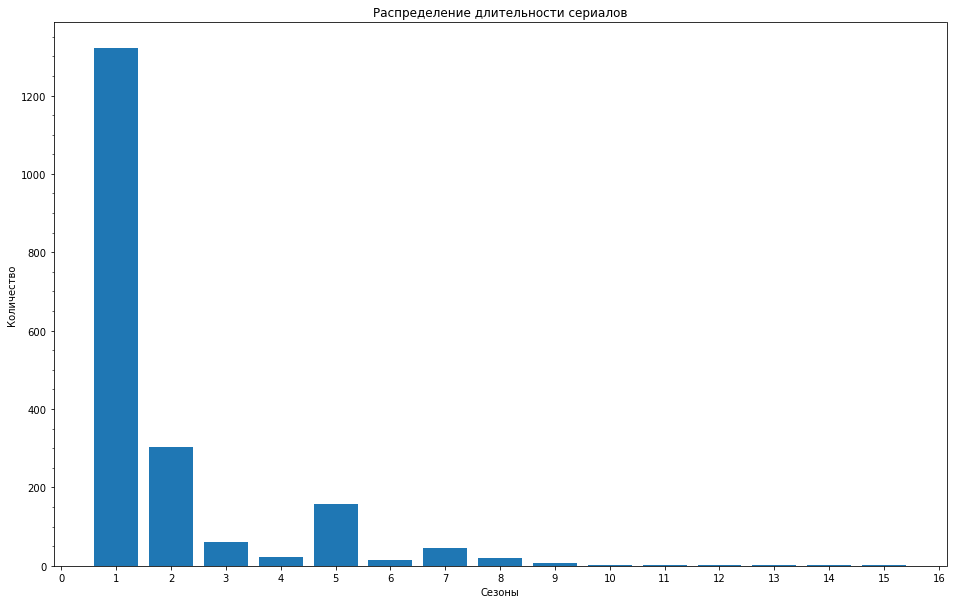

In [96]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(seasons, series_duration)
ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Сезоны')
plt.ylabel('Количество')
plt.title('Распределение длительности сериалов')


Абсолютное большинство сериалов длятся 1 сезон. В отличие от длительности фильмов, распределение длительности сериалов не является нормальным. Это может связано с тем, что длительность сериалов измеряется в сезонах, а не в минутах. 